# Final Tutorial: Newsletter Data

This project will analyze data from The Root, a financial literacy newsletter I send out every week. I will be analyzing both subscriber and campaign data. The data is collected through Mailchimp, the ESP I use to send out The Root.

In [96]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import os.path
import matplotlib.pyplot as plt
import glob
import seaborn as sns

## Loading in Data 

In [110]:
sub_df = pd.read_csv("./newsletteraudience/subscribed.csv")
unsub_df = pd.read_csv("./newsletteraudience/unsubscribed.csv")
sub_df

,What's your first name?,Last name?,Email?,How did you find us?,"From 1-10, how comfortable do you feel with money?",MEMBER_RATING,OPTIN_TIME,OPTIN_IP,CONFIRM_TIME,CONFIRM_IP,...,GMTOFF,DSTOFF,TIMEZONE,CC,REGION,LAST_CHANGED,LEID,EUID,NOTES,TAGS
0,Jaye,Kasper,jayemkasper@gmail.com,Daniella Seidl,8,2,2019-09-28 14:51:57,NaN,2019-09-28 14:51:57,166.216.158.66,...,'-8,'-7,America/Los_Angeles,US,CA,2019-09-28 14:51:57,369765457,f376d37816,NaN,NaN
1,NaN,NaN,mberman4@tulane.edu,NaN,NaN,2,2019-08-12 06:40:53,NaN,2019-08-12 06:40:53,NaN,...,NaN,NaN,908,us,nj,2019-08-12 06:40:53,360048529,cf1be2610e,NaN,NaN
2,NaN,NaN,cpae@tulane.edu,NaN,NaN,3,2019-11-03 21:02:04,NaN,2019-11-03 21:02:04,129.81.211.212,...,NaN,NaN,NaN,NaN,NaN,2019-11-03 21:02:04,388446525,b426fd2d1a,NaN,NaN
3,Danielle,Berman,dberman2@tulane.edu,Moriah Jacobs,NaN,3,2019-08-18 23:22:38,NaN,2019-08-18 23:22:38,108.36.95.90,...,'-5,'-4,504,us,la,2019-08-18 23:22:38,361398637,d96df45888,NaN,NaN
4,Ricki,Sperry,rickisperry4@gmail.com,Olivia Epstein,5,3,2019-10-29 11:37:19,NaN,2019-10-29 11:37:19,128.230.194.54,...,NaN,NaN,NaN,NaN,NaN,2019-10-29 11:37:19,387515781,cf7cbd98ed,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,Jordan,Battle,jbattle1@tulane.edu,Cat Olivier,5,2,2019-10-22 22:07:01,NaN,2019-10-22 22:07:01,129.81.72.255,...,'-6,'-5,America/Indiana/Knox,US,LA,2019-10-22 22:07:01,378749621,ea363f769b,NaN,NaN
674,NaN,NaN,katybrosnan@gmail.com,NaN,NaN,2,2019-11-05 11:07:04,NaN,2019-11-05 11:07:04,68.11.26.175,...,NaN,NaN,NaN,NaN,NaN,2019-11-05 11:07:04,388703125,ed8db95953,NaN,NaN
675,elana,israeli,elana_israeli@aol.com,NaN,NaN,2,2019-09-02 22:02:51,NaN,2019-09-02 22:02:51,98.163.225.107,...,'-6,'-5,504,us,la,2019-09-02 22:02:51,367034337,7a5e179bc4,NaN,NaN
676,NaN,NaN,tania@juanalaiguana.com,NaN,NaN,5,2019-08-12 06:40:53,NaN,2019-08-12 06:40:53,NaN,...,NaN,NaN,770/678/470,us,ga,2019-08-12 06:40:53,360048625,e260f6f0bf,NaN,NaN


In [117]:
df1 = pd.read_csv("./campaigns.csv")
df1

,Title,Subject,List,Send Date,Send Weekday,Total Recipients,Successful Deliveries,Soft Bounces,Hard Bounces,Total Bounces,...,Click Rate,Total Clicks,Unsubscribes,Abuse Complaints,Times Liked on Facebook,Folder Id,Unique Id,Total Orders,Total Gross Sales,Total Revenue
0,newsletter no.1,newsletter no.1,the root,"Aug 12, 2019 06:58 am",Monday,212,210,1,1,2,...,4.29%,17,3,0,0,0,52dc3b9652,0,0,0
1,(copy 01),newsletter no.1,the root,"Aug 12, 2019 09:46 am",Monday,1,1,0,0,0,...,0.00%,0,0,0,0,0,cd248d0904,0,0,0
2,newsletter 2,get. that. money. (newsletter no. 2),the root,"Aug 19, 2019 07:02 am",Monday,233,232,1,0,1,...,0.00%,0,0,0,0,0,9678b64e0a,0,0,0
3,newsletter 2 (copy 01),get. that. money. (newsletter no. 2),the root,"Aug 19, 2019 04:50 pm",Monday,4,4,0,0,0,...,0.00%,0,0,0,0,0,947745607a,0,0,0
4,newsletter 3,all. i. see. is. $$$$ (newsletter no. 3),the root,"Aug 26, 2019 07:00 am",Monday,254,253,1,0,1,...,0.00%,0,3,0,0,0,2ce6a43658,0,0,0
5,[Re-sent] newsletter 3,all. i. see. is. $$$$ (newsletter no. 3),the root,"Aug 27, 2019 02:43 pm",Tuesday,125,124,1,0,1,...,0.00%,0,0,0,0,0,f4590c31ee,0,0,0
6,newsletter 4,turns out i'm 100% that rich.,the root,"Sep 02, 2019 09:37 am",Monday,268,266,2,0,2,...,1.88%,8,2,0,0,0,8948eb5765,0,0,0
7,[Re-sent] newsletter 4,turns out i'm 100% that rich.,the root,"Sep 04, 2019 10:57 am",Wednesday,159,158,0,1,1,...,0.00%,0,0,0,0,0,9ef2489177,0,0,0
8,newsletter 5,if you're reading this...,the root,"Sep 09, 2019 03:05 am",Monday,278,278,0,0,0,...,0.72%,3,1,0,0,0,eaf380c10e,0,0,0
9,Newsletter 6,hey... we need to talk,the root,"Sep 16, 2019 07:49 am",Monday,283,282,1,0,1,...,1.06%,6,1,0,0,0,15129cdaa5,0,0,0


## Aggregating, sorting, and tidying data

In [119]:
metrics = sub_df.iloc[:, 0:7]
metrics1 = sub_df.iloc[:, 8:9]
metrics2 = sub_df.iloc[:, 16]

df_cols_of_interest = pd.concat([metrics, metrics1, metrics2], axis = 1)
df_cols_of_interest.rename(columns = {"What's your first name?" : "first", "Last name?" : "last", "Email?" : "Email", "How did you find us?" : "Referrer", "From 1-10, how comfortable do you feel with money?":"Comfort", "MEMBER_RATING" : "Rating", "OPTIN_TIME" : "signup_date", "REGION" : "Region"}, inplace = True)

df_cols_of_interest["Name"] = df_cols_of_interest["first"].map(str) + " " + df_cols_of_interest["last"] 
df = df_cols_of_interest

df.drop(columns = ['first', 'last', "CONFIRM_TIME"], inplace = True)

df.set_index("Email")

,Referrer,Comfort,Rating,signup_date,Region,Name
Email,,,,,,
jayemkasper@gmail.com,Daniella Seidl,8,2,2019-09-28 14:51:57,CA,Jaye Kasper
mberman4@tulane.edu,NaN,NaN,2,2019-08-12 06:40:53,nj,NaN
cpae@tulane.edu,NaN,NaN,3,2019-11-03 21:02:04,NaN,NaN
dberman2@tulane.edu,Moriah Jacobs,NaN,3,2019-08-18 23:22:38,la,Danielle Berman
rickisperry4@gmail.com,Olivia Epstein,5,3,2019-10-29 11:37:19,NaN,Ricki Sperry
...,...,...,...,...,...,...
jbattle1@tulane.edu,Cat Olivier,5,2,2019-10-22 22:07:01,LA,Jordan Battle
katybrosnan@gmail.com,NaN,NaN,2,2019-11-05 11:07:04,NaN,NaN
elana_israeli@aol.com,NaN,NaN,2,2019-09-02 22:02:51,la,elana israeli


In [118]:
df.fillna(0)
df['signup_date'] = pd.to_datetime(df['signup_date'])
df

,Email,Referrer,Comfort,Rating,signup_date,Region,Name
0,jayemkasper@gmail.com,Daniella Seidl,8,2,2019-09-28 14:51:57,CA,Jaye Kasper
1,mberman4@tulane.edu,NaN,NaN,2,2019-08-12 06:40:53,nj,NaN
2,cpae@tulane.edu,NaN,NaN,3,2019-11-03 21:02:04,NaN,NaN
3,dberman2@tulane.edu,Moriah Jacobs,NaN,3,2019-08-18 23:22:38,la,Danielle Berman
4,rickisperry4@gmail.com,Olivia Epstein,5,3,2019-10-29 11:37:19,NaN,Ricki Sperry
...,...,...,...,...,...,...,...
673,jbattle1@tulane.edu,Cat Olivier,5,2,2019-10-22 22:07:01,LA,Jordan Battle
674,katybrosnan@gmail.com,NaN,NaN,2,2019-11-05 11:07:04,NaN,NaN
675,elana_israeli@aol.com,NaN,NaN,2,2019-09-02 22:02:51,la,elana israeli
676,tania@juanalaiguana.com,NaN,NaN,5,2019-08-12 06:40:53,ga,NaN


In [120]:
df_interest = df1.iloc[:, 0:21]
metrics1 = df_interest.iloc[:, 1]
metrics2 = df_interest.iloc[:, 5:9]
metrics3 = df_interest.iloc[:, 12:18]
metrics = pd.concat([metrics1, metrics2, metrics3], axis = 1)
metrics.dropna()

,Subject,Total Recipients,Successful Deliveries,Soft Bounces,Hard Bounces,Unique Opens,Open Rate,Total Opens,Unique Clicks,Click Rate,Total Clicks
0,newsletter no.1,212,210,1,1,113,53.81%,280,9,4.29%,17
1,newsletter no.1,1,1,0,0,1,100.00%,2,0,0.00%,0
2,get. that. money. (newsletter no. 2),233,232,1,0,129,55.60%,235,0,0.00%,0
3,get. that. money. (newsletter no. 2),4,4,0,0,3,75.00%,7,0,0.00%,0
4,all. i. see. is. $$$$ (newsletter no. 3),254,253,1,0,140,55.34%,251,0,0.00%,0
5,all. i. see. is. $$$$ (newsletter no. 3),125,124,1,0,35,28.23%,53,0,0.00%,0
6,turns out i'm 100% that rich.,268,266,2,0,120,45.11%,227,5,1.88%,8
7,turns out i'm 100% that rich.,159,158,0,1,24,15.19%,35,0,0.00%,0
8,if you're reading this...,278,278,0,0,121,43.53%,214,2,0.72%,3
9,hey... we need to talk,283,282,1,0,106,37.59%,240,3,1.06%,6


In [121]:
df1.sort_values("Open Rate", ascending = False)

,Title,Subject,List,Send Date,Send Weekday,Total Recipients,Successful Deliveries,Soft Bounces,Hard Bounces,Total Bounces,...,Click Rate,Total Clicks,Unsubscribes,Abuse Complaints,Times Liked on Facebook,Folder Id,Unique Id,Total Orders,Total Gross Sales,Total Revenue
12,Newsletter 7 (copy 01),hey... we need to talk.,the root,"Sep 23, 2019 06:00 am",Monday,48,48,0,0,0,...,8.33%,8,0,0,0,0,e13f190738,0,0,0
13,[Re-sent] Newsletter 7 (copy 01),hey... we need to talk.,the root,"Sep 23, 2019 10:02 pm",Monday,5,5,0,0,0,...,0.00%,0,0,0,0,0,b32ab10184,0,0,0
3,newsletter 2 (copy 01),get. that. money. (newsletter no. 2),the root,"Aug 19, 2019 04:50 pm",Monday,4,4,0,0,0,...,0.00%,0,0,0,0,0,947745607a,0,0,0
2,newsletter 2,get. that. money. (newsletter no. 2),the root,"Aug 19, 2019 07:02 am",Monday,233,232,1,0,1,...,0.00%,0,0,0,0,0,9678b64e0a,0,0,0
4,newsletter 3,all. i. see. is. $$$$ (newsletter no. 3),the root,"Aug 26, 2019 07:00 am",Monday,254,253,1,0,1,...,0.00%,0,3,0,0,0,2ce6a43658,0,0,0
22,Newsletter 12.1 | Winner,rip vine. 😢,the root,"Oct 28, 2019 10:00 am",Monday,264,264,0,0,0,...,4.55%,26,0,0,0,0,c51665f524,0,0,0
0,newsletter no.1,newsletter no.1,the root,"Aug 12, 2019 06:58 am",Monday,212,210,1,1,2,...,4.29%,17,3,0,0,0,52dc3b9652,0,0,0
17,Newsletter 9 (copy 01),hi... DTR? ⌛,the root,"Oct 14, 2019 09:11 am",Monday,392,391,1,0,1,...,11.51%,105,2,0,0,0,9ba4b7abbe,0,0,0
21,Newsletter 12.1,NaN,the root,"Oct 28, 2019 07:00 am",Monday,528,526,1,1,2,...,3.99%,0,0,0,0,0,25126672dc,0,0,0
19,Newsletter 12.1 | Combo 1,rip vine. 😢,the root,"Oct 28, 2019 06:59 am",Monday,132,131,0,1,1,...,3.82%,17,0,0,0,0,ef10bb704b,0,0,0


## Tidy-ed Data

In [20]:
metrics.head()

,Subject,Total Recipients,Successful Deliveries,Soft Bounces,Hard Bounces,Unique Opens,Open Rate,Total Opens,Unique Clicks,Click Rate,Total Clicks
0,newsletter no.1,212,210,1,1,113,53.81%,280,9,4.29%,17
1,newsletter no.1,1,1,0,0,1,100.00%,2,0,0.00%,0
2,get. that. money. (newsletter no. 2),233,232,1,0,129,55.60%,235,0,0.00%,0
3,get. that. money. (newsletter no. 2),4,4,0,0,3,75.00%,7,0,0.00%,0
4,all. i. see. is. $$$$ (newsletter no. 3),254,253,1,0,140,55.34%,251,0,0.00%,0


## Descriptive Statistics of subscriber list

In [122]:
metrics.describe()

,Total Recipients,Successful Deliveries,Soft Bounces,Hard Bounces,Unique Opens,Total Opens,Unique Clicks,Total Clicks
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,237.629630,236.888889,0.592593,0.148148,100.925926,207.074074,10.222222,20.333333
std,151.475093,151.242631,0.636049,0.362014,70.713901,152.740586,14.671619,38.077855
min,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
25%,143.000000,142.000000,0.000000,0.000000,39.000000,73.500000,0.000000,0.000000
50%,233.000000,232.000000,1.000000,0.000000,113.000000,218.000000,4.000000,7.000000
75%,295.500000,295.000000,1.000000,0.000000,142.500000,290.500000,11.000000,17.000000
max,616.000000,614.000000,2.000000,1.000000,267.000000,547.000000,52.000000,151.000000


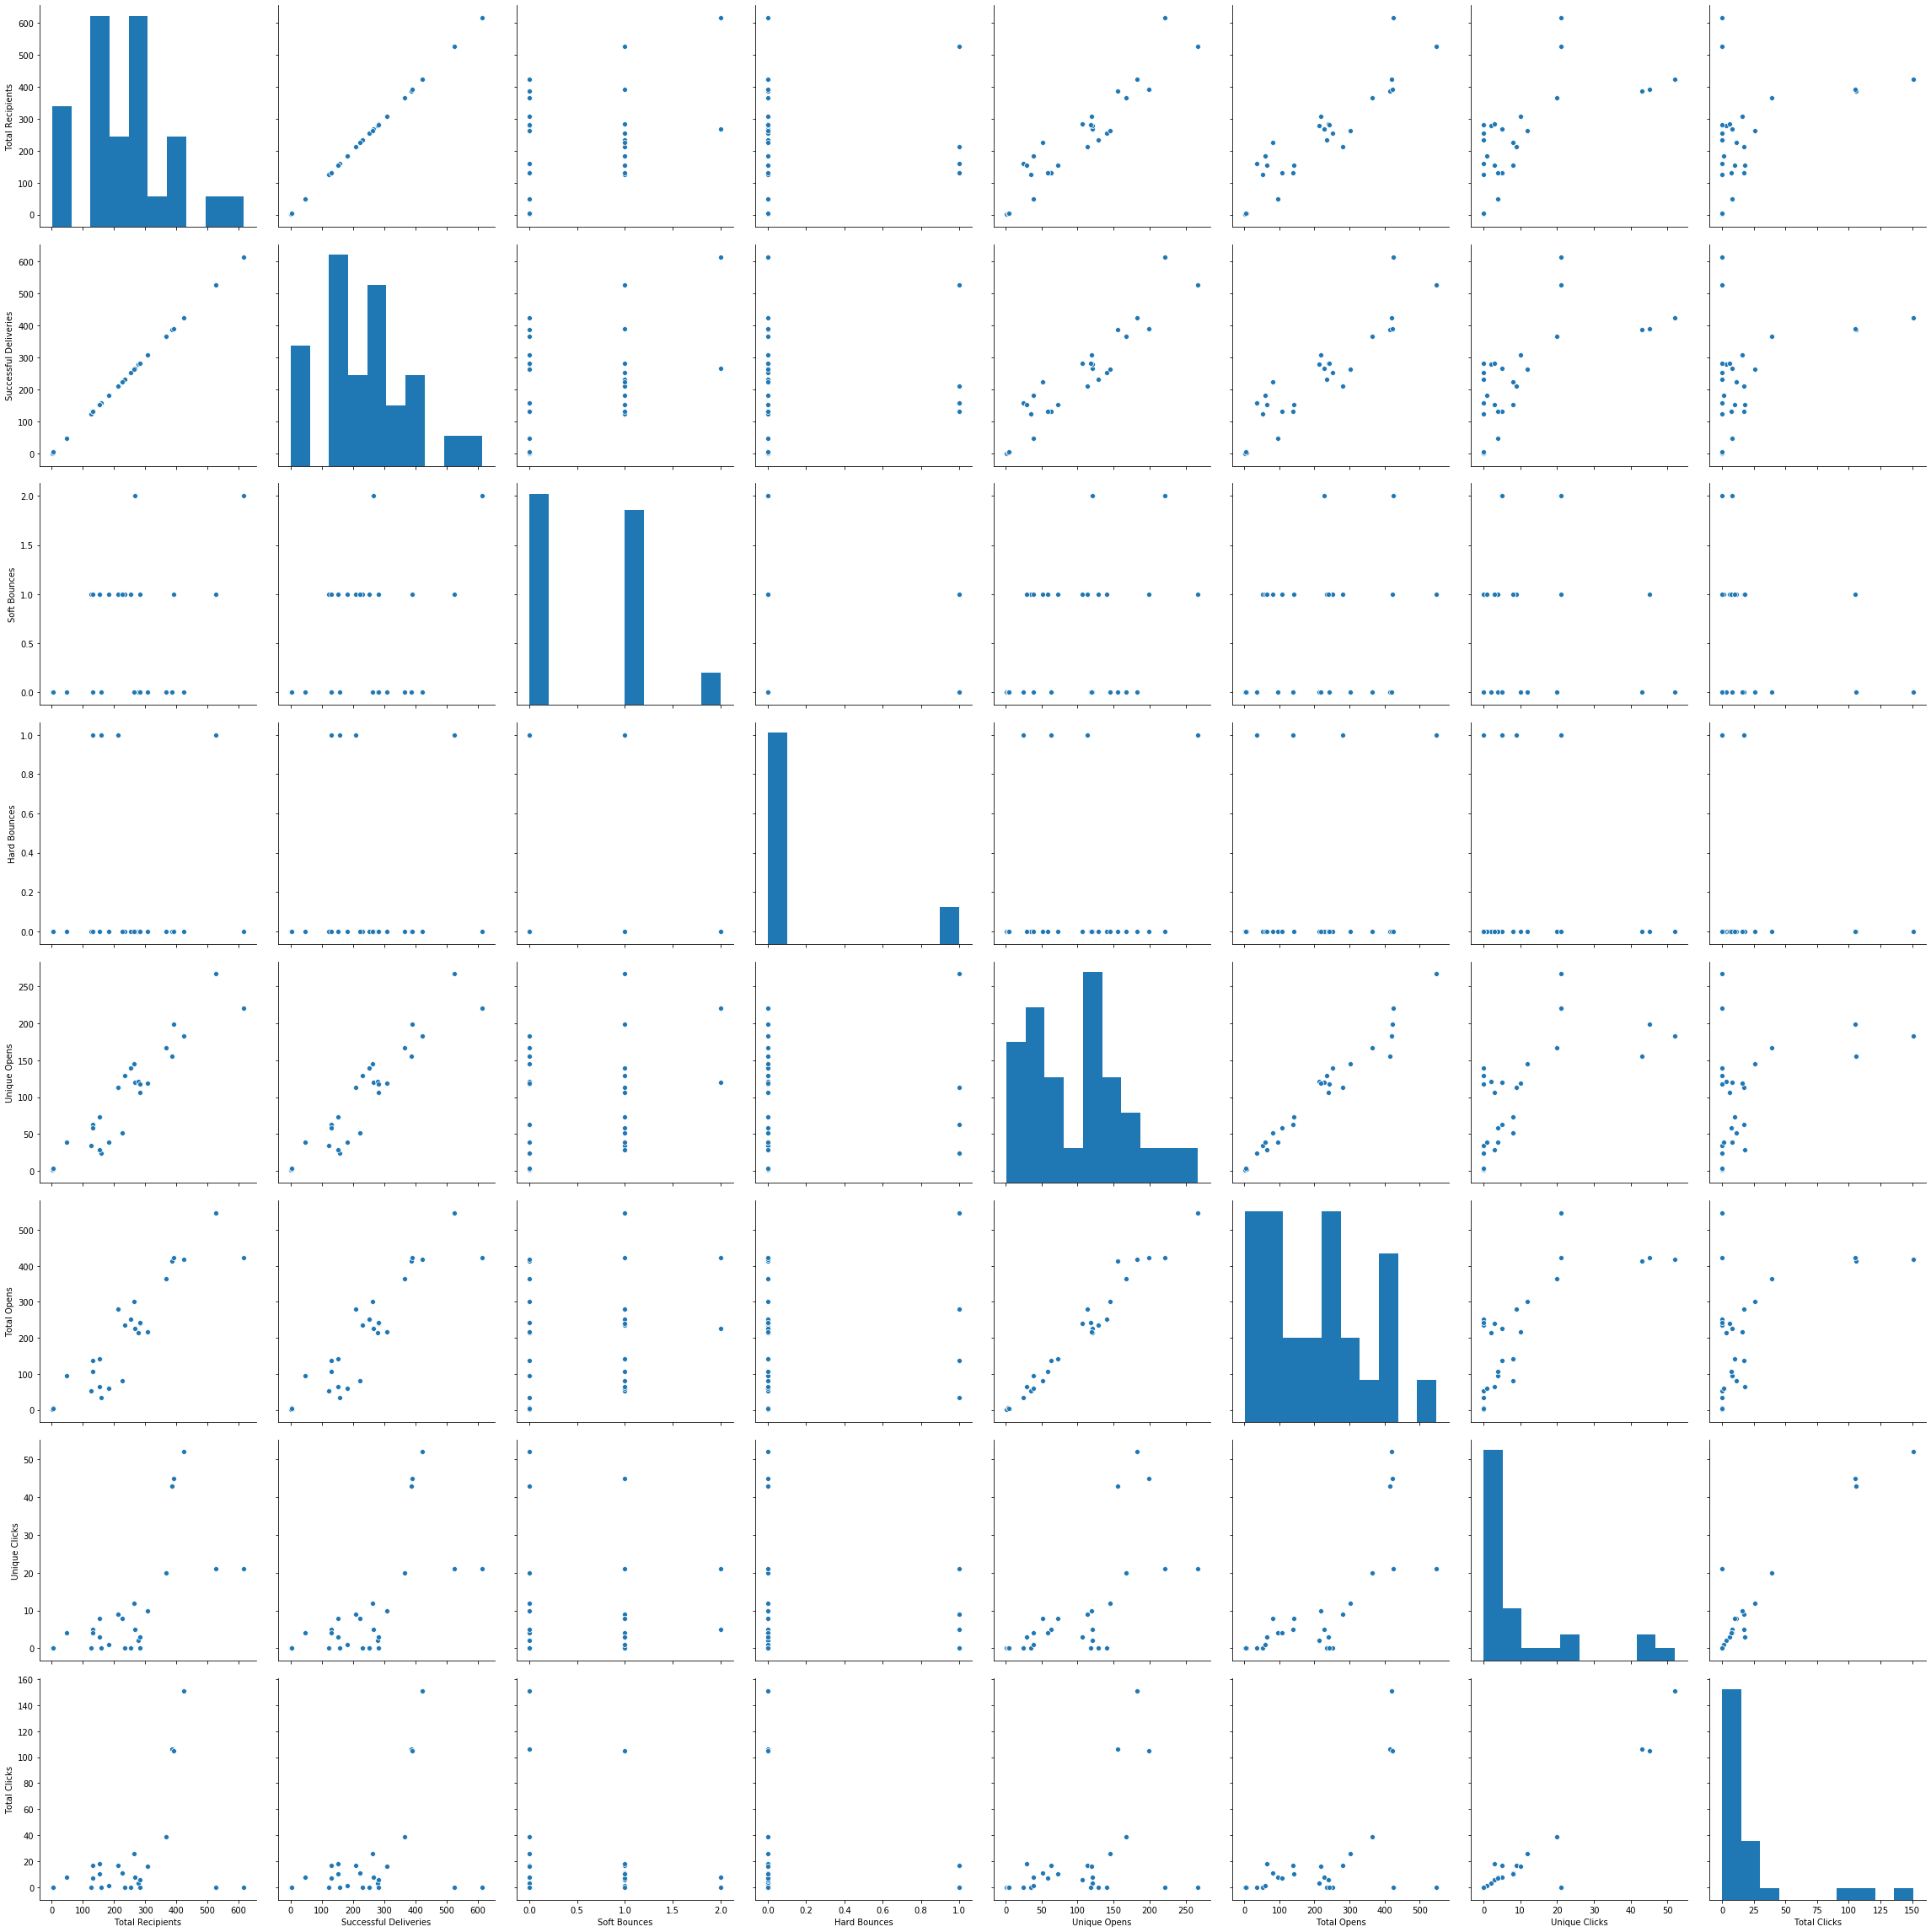

In [123]:
sns.pairplot(metrics, height = 4)

The graphs above represent all the possible columns as x's and y's and give a general overview of the data. 

<Figure size 1800x1800 with 0 Axes>

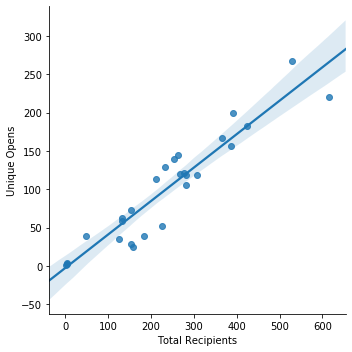

In [124]:
plt.figure(figsize = (25,25))
sns.lmplot(x="Total Recipients", y = "Unique Opens", data = metrics)

The graph above shows a positive correlation between number of recipients and number of unique opens of the newsletter. 